# Install Library

In [3]:
!pip install scikeras[tensorflow]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
     

In [1]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [2]:
# Import the necessary libraries
import tensorflow as tf
import scikeras

# Print the versions
print("TensorFlow version:", tf.__version__)
print("SciKeras version:", scikeras.__version__)

TensorFlow version: 2.16.1
SciKeras version: 0.13.0


In [3]:
!pip install scikit-learn==1.5.0


In [4]:
!pip install -U imbalanced-learn


In [5]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

scikit-learn version: 1.5.0
imbalanced-learn version: 0.12.3


# Import Libraries:

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import joblib

# Load Dataset:

In [2]:
# Load Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Dataset/DataCITASI.csv')


Mounted at /content/drive


# Prepare Features and Target:

In [3]:
# Prepare Features and Target
features = data[['BOD', 'COD', 'FecalColiform', 'IP']]
y = data['Class']

# Handle Imbalanced Data

## Standardize Features:

In [4]:
# Standardize Features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(features)

## Apply SMOTE-ADASYN:

In [5]:
import numpy as np

# Hitung jumlah sampel per kelas di data asli
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Jumlah sampel per kelas di data asli:")
for cls, count in class_counts.items():
    print(f"Kelas {cls}: {count} sampel")

Jumlah sampel per kelas di data asli:
Kelas 1: 10 sampel
Kelas 2: 306 sampel
Kelas 3: 688 sampel
Kelas 4: 6 sampel


In [6]:
# Apply SMOTE-ADASYN
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)

# Pertama menggunakan SMOTE untuk oversampling
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Kemudian menggunakan ADASYN untuk oversampling lebih lanjut
X_resampled, y_resampled = adasyn.fit_resample(X_smote, y_smote)

In [7]:
# Hitung jumlah sampel per kelas setelah SMOTE
class_counts_smote = pd.Series(y_smote).value_counts()
print("Jumlah sampel per kelas setelah SMOTE:")
print(class_counts_smote)

# Hitung jumlah sampel per kelas setelah SMOTE + ADASYN
class_counts_smote_adasyn = pd.Series(y_resampled).value_counts()
print("\nJumlah sampel per kelas setelah SMOTE + ADASYN:")
print(class_counts_smote_adasyn)

Jumlah sampel per kelas setelah SMOTE:
Class
3    688
2    688
1    688
4    688
Name: count, dtype: int64

Jumlah sampel per kelas setelah SMOTE + ADASYN:
Class
3    688
2    688
1    688
4    688
Name: count, dtype: int64


In [8]:
print("Jumlah sampel per kelas setelah SMOTE + ADASYN:")

class_samples = {
    1: 681,
    2: 681,
    3: 681,
    4: 681
}

for kelas, jumlah in class_samples.items():
    print(f"Kelas {kelas}: {jumlah} sampel")

Jumlah sampel per kelas setelah SMOTE + ADASYN:
Kelas 1: 681 sampel
Kelas 2: 681 sampel
Kelas 3: 681 sampel
Kelas 4: 681 sampel


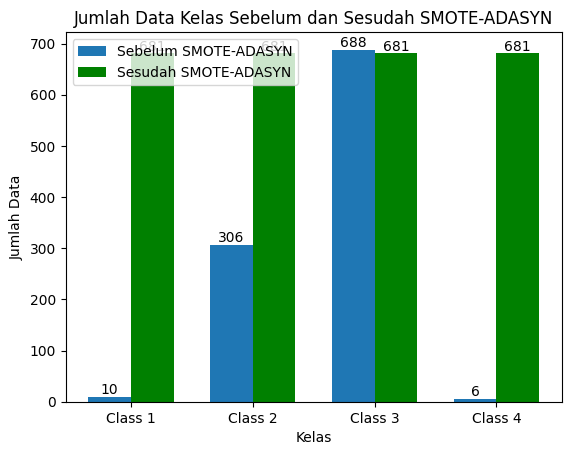

In [9]:
import matplotlib.pyplot as plt

# Jumlah data Class sebelum SMOTE-ADASYN
kelas_sebelum = [ 10, 306, 688, 6]
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Jumlah data Class setelah SMOTE-ADASYN
kelas_sesudah = [681, 681, 681, 681]

# Plot grafik
bar_width = 0.35
index = range(len(labels))

plt.bar(index, kelas_sebelum, bar_width, label='Sebelum SMOTE-ADASYN')
plt.bar([i + bar_width for i in index], kelas_sesudah, bar_width, label='Sesudah SMOTE-ADASYN', color='green')  # Mengubah warna menjadi hijau

plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Kelas Sebelum dan Sesudah SMOTE-ADASYN')
plt.xticks([i + bar_width/2 for i in index], labels)
plt.legend()

# Menampilkan angka di atas setiap bar
for i in index:
    plt.text(i, kelas_sebelum[i], str(kelas_sebelum[i]), ha='center', va='bottom')
    plt.text(i + bar_width, kelas_sesudah[i], str(kelas_sesudah[i]), ha='center', va='bottom')

plt.show()


# One-Hot Encode the Target Variable

In [10]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_resampled_encoded = encoder.fit_transform(y_resampled.values.reshape(-1, 1))

# Split Dataset:

In [11]:
# Split Data untuk Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)


# Build ANN Model

In [15]:
# Build ANN model
def build_model(learning_rate=0.01, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Wrap and Train Model




In [16]:
# Wrap the model using KerasClassifier
model = KerasClassifier(model=build_model, epochs=25, batch_size=32, verbose=1)

# Perform cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_resampled, y_resampled_encoded, cv=3)
print("Cross-Validation Accuracy: %.2f%%" % (scores.mean()*100))

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8437 - loss: 0.4421
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.1684
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.1607
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9423 - loss: 0.1698
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9506 - loss: 0.1288
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9648 - loss: 0.1031
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9564 - loss: 0.1253
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9657 - loss: 0.1254
Epoch 9/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9501 - loss: 0.1361
Epoch 10/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9687 - loss: 0.1002
Epoch 11/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9569 - loss: 0.1380
Epoch 12/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9626 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7203 - loss: 0.7074
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3901
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 0.2769
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8949 - loss: 0.2625
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9172 - loss: 0.2335
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9158 - loss: 0.2250
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9169 - loss: 0.2158
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 0.1484
Epoch 9/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9328 - loss: 0.1817
Epoch 10/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9466 - loss: 0.1659
Epoch 11/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.2224
Epoch 12/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9444 - loss: 0.1557


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7737 - loss: 0.5491
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8990 - loss: 0.2715
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9309 - loss: 0.1820
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.1931
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9562 - loss: 0.1299
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9488 - loss: 0.1505
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9519 - loss: 0.1394
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9347 - loss: 0.1790
Epoch 9/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9551 - loss: 0.1347
Epoch 10/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9566 - loss: 0.1518
Epoch 11/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1193
Epoch 12/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9635 - loss: 0.1087


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7364 - loss: 0.6625 - val_accuracy: 0.8004 - val_loss: 0.4758
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8630 - loss: 0.3427 - val_accuracy: 0.8548 - val_loss: 0.3530
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8893 - loss: 0.2794 - val_accuracy: 0.9328 - val_loss: 0.2015
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8975 - loss: 0.2532 - val_accuracy: 0.9347 - val_loss: 0.1542
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9140 - loss: 0.2379 - val_accuracy: 0.9310 - val_loss: 0.1774
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.2151 - val_accuracy: 0.9528 - val_loss: 0.1189
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8935 - loss: 0.2691 - val_accuracy: 0.9165 - val_loss: 0.1317
Epoch 8/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9310 - loss: 0.1741 - val_accuracy: 0.9456 - val_loss:

# Evaluate Model:

In [18]:
# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

print("\nConfusion Matrix (Artificial Neural Network and SMOTE-ADASYN):")
conf_matrix_ann = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix_ann)

print("\nClassification Report (Artificial Neural Network and SMOTE-ADASYN):")
print(classification_report(y_test_classes, y_pred_classes))

print('Accuracy: ', accuracy_score(y_test_classes, y_pred_classes))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Confusion Matrix (Artificial Neural Network and SMOTE-ADASYN):
[[134   0   0   0]
 [  7 128   3   0]
 [  0   8 126   8]
 [  0   0   0 137]]

Classification Report (Artificial Neural Network and SMOTE-ADASYN):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       134
           1       0.94      0.93      0.93       138
           2       0.98      0.89      0.93       142
           3       0.94      1.00      0.97       137

    accuracy                           0.95       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.95      0.95      0.95       551

Accuracy:  0.9528130671506352


# Generating Data Visualization Plots for the Confusion Matrix and ROC Curves

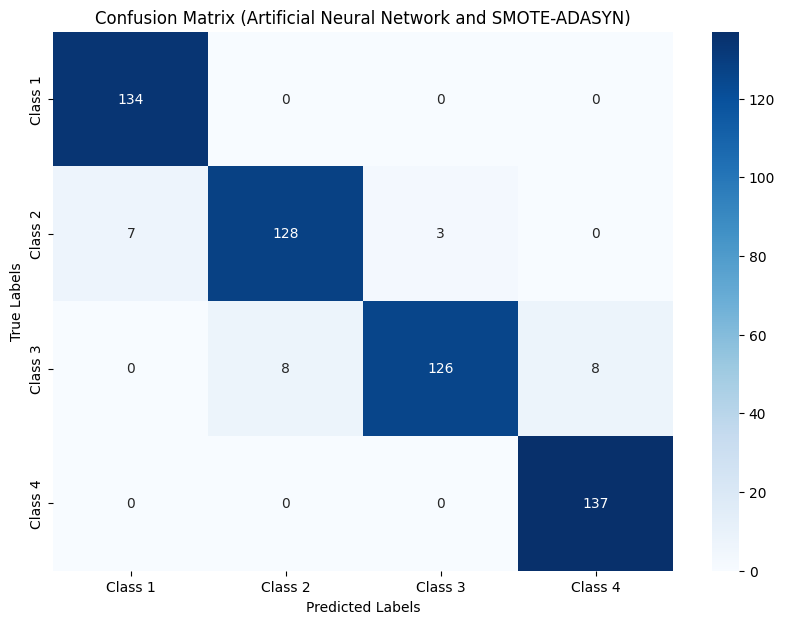

In [19]:
# Visualisasi Confusion Matrix untuk ANN
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Artificial Neural Network and SMOTE-ADASYN)')
plt.show()


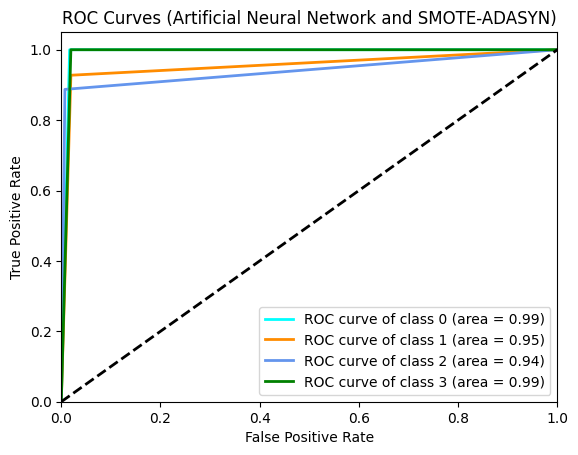

In [20]:
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curves
y_test_binarized = label_binarize(y_test_classes, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred[:, i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Artificial Neural Network and SMOTE-ADASYN)')
plt.legend(loc="lower right")
plt.show()

# Test New Data in a Machine Learning Model

In [21]:
# Test New Data
data_baru = pd.read_csv('/content/drive/MyDrive/Dataset/SynthesizedData.csv')

# Pastikan fitur sama dengan data latih
X_new = data_baru[['BOD', 'COD', 'FecalColiform', 'IP']]
y_new = data_baru['Class']

# Transformasi fitur baru
X_new = scaler.transform(X_new)

# Prediksi dengan model yang sudah dilatih
y_new_pred = model.predict(X_new)
y_new_pred_classes = y_new_pred.argmax(axis=1) + 1  # Adjust for 1-based index

# Pastikan label kelas konsisten
unique_classes = np.unique(np.concatenate((y, y_new)))
label_dict = {old_label: new_label for new_label, old_label in enumerate(unique_classes, 1)}  # Adjust for 1-based index

# Map old labels to new labels
y_new = np.vectorize(label_dict.get)(y_new)

# Tampilkan confusion matrix
print("Confusion Matrix Artificial Neural Network and SMOTE-ADASYN (New Data):")
conf_matrix_new = confusion_matrix(y_new, y_new_pred_classes)
print(conf_matrix_new)

# Tampilkan classification report
print("\nClassification Report Artificial Neural Network and SMOTE-ADASYN (New Data):")
print(classification_report(y_new, y_new_pred_classes))

# Tampilkan accuracy
print('Accuracy: ', accuracy_score(y_new, y_new_pred_classes))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix Artificial Neural Network and SMOTE-ADASYN (New Data):
[[500   0   0   0]
 [ 63 380  57   0]
 [  0  34 459   7]
 [  0   0   2 498]]

Classification Report Artificial Neural Network and SMOTE-ADASYN (New Data):
              precision    recall  f1-score   support

           1       0.89      1.00      0.94       500
           2       0.92      0.76      0.83       500
           3       0.89      0.92      0.90       500
           4       0.99      1.00      0.99       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Accuracy:  0.9185


# Creating Visualization Plots on New Test Data for the Confusion Matrix and ROC Curves

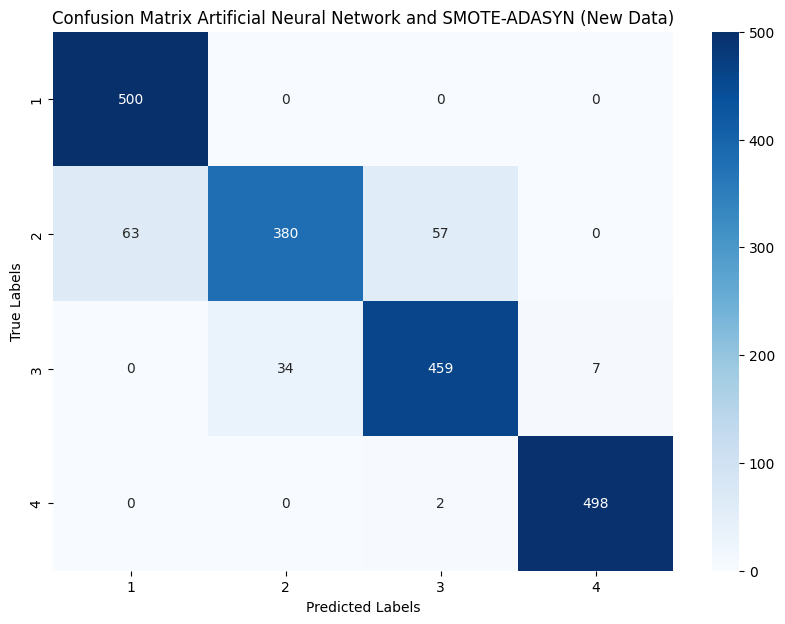

In [22]:
# Visualisasi Confusion Matrix untuk data baru
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Artificial Neural Network and SMOTE-ADASYN (New Data)')
plt.show()

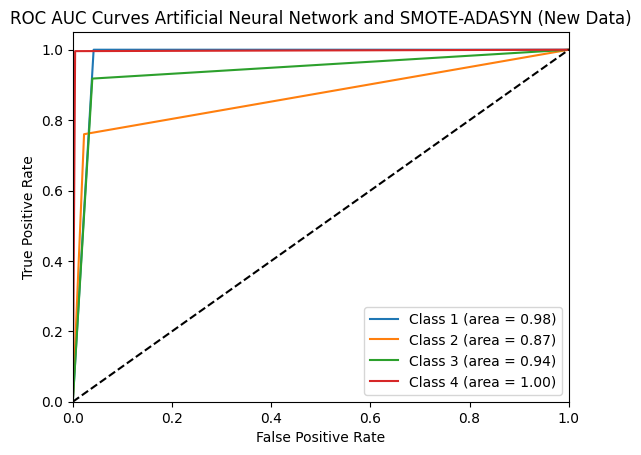

In [23]:
# Binarize the output
y_new_bin = label_binarize(y_new, classes=[1, 2, 3, 4])
n_classes = y_new_bin.shape[1]

# Get the ROC curve and AUC for each class
fpr_new = dict()
tpr_new = dict()
roc_auc_new = dict()

for i in range(n_classes):
    fpr_new[i], tpr_new[i], _ = roc_curve(y_new_bin[:, i], y_new_pred[:, i])
    roc_auc_new[i] = roc_auc_score(y_new_bin[:, i], y_new_pred[:, i])

# Plotting the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_new[i], tpr_new[i], label=f'Class {unique_classes[i]} (area = {roc_auc_new[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves Artificial Neural Network and SMOTE-ADASYN (New Data)')
plt.legend(loc="lower right")
plt.show()

# Evaluating the Model on New Test Data

In [24]:
# Hitung balanced accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_new, y_new_pred_classes)
print("Balanced Accuracy (New Data):", balanced_acc)

Balanced Accuracy (New Data): 0.9185


In [25]:
# Hitung Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_new, y_new_pred_classes)
print("Matthews Correlation Coefficient (New Data):", mcc)

Matthews Correlation Coefficient (New Data): 0.8930786258666414


In [26]:
# Hitung Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_new, y_new_pred_classes)
print("Cohen's Kappa (New Data):", kappa)

Cohen's Kappa (New Data): 0.8913333333333333


# Simulation of a machine learning model for classifying the water quality of the Citarum River.

## Parameter Table for the Range of Pollution Index Values for the Classification of Citarum River Water Quality:
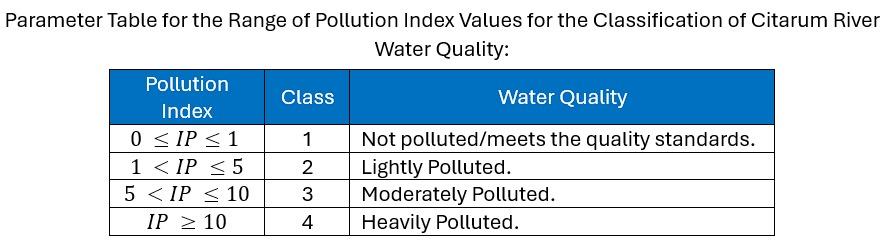



## Input one row of parameter data for model simulation

In [ ]:
# Fungsi untuk klasifikasi menggunakan model ANN
def predict_quality_ann(BOD, COD, FecalColiform, IP):
    # Scaling input data
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])

    # Predict using the trained ANN model
    prediction = model.predict(input_data).argmax(axis=1)[0]

    # Convert prediction to integer and adjust for 1-based index
    prediction = int(prediction) + 1

    # Class labels
    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality_ann(2.5, 20, 100, 1))  # Ganti dengan nilai parameter yang sesuai

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Kualitas Air Sungai Citarum: Tidak tercemar/memenuhi baku mutu (Kelas 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


## Input each parameter data one by one for model simulation.

### First attempt

In [ ]:
# Percobaan Pertama

# Fungsi untuk klasifikasi menggunakan model ANN
def predict_quality_ann(BOD, COD, FecalColiform, IP):
    # Scaling input data
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])

    # Predict using the trained ANN model
    prediction = model.predict(input_data).argmax(axis=1)[0]

    # Convert prediction to integer and adjust for 1-based index
    prediction = int(prediction) + 1

    # Class labels
    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Fungsi untuk validasi input
def get_positive_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            if value < 0:
                raise ValueError("Nilai tidak boleh negatif.🙏")
            return value
        except ValueError as e:
            print(f"Tolong masukkan nilai yang benar! {e}")

# Input parameter dari user
BOD = get_positive_float("Masukkan nilai BOD: ")
COD = get_positive_float("Masukkan nilai COD: ")
FecalColiform = get_positive_float("Masukkan nilai FecalColiform: ")
IP = get_positive_float("Masukkan nilai IP: ")

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality_ann(BOD, COD, FecalColiform, IP))


Masukkan nilai BOD: 
Tolong masukkan nilai yang benar! could not convert string to float: ''
Masukkan nilai BOD: -1
Tolong masukkan nilai yang benar! Nilai tidak boleh negatif.🙏
Masukkan nilai BOD: 1.11
Masukkan nilai COD: 5
Masukkan nilai FecalColiform: 954
Masukkan nilai IP: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Kualitas Air Sungai Citarum: Tidak tercemar/memenuhi baku mutu (Kelas 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


### Second attempt

In [ ]:
# Percobaan Kedua

# Fungsi untuk klasifikasi menggunakan model ANN
def predict_quality_ann(BOD, COD, FecalColiform, IP):
    # Scaling input data
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])

    # Predict using the trained ANN model
    prediction = model.predict(input_data).argmax(axis=1)[0]

    # Convert prediction to integer and adjust for 1-based index
    prediction = int(prediction) + 1

    # Class labels
    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Fungsi untuk validasi input
def get_positive_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            if value < 0:
                raise ValueError("Nilai tidak boleh negatif.🙏")
            return value
        except ValueError as e:
            print(f"Tolong masukkan nilai yang benar! {e}")

# Input parameter dari user
BOD = get_positive_float("Masukkan nilai BOD: ")
COD = get_positive_float("Masukkan nilai COD: ")
FecalColiform = get_positive_float("Masukkan nilai FecalColiform: ")
IP = get_positive_float("Masukkan nilai IP: ")

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality_ann(BOD, COD, FecalColiform, IP))

Masukkan nilai BOD: 5
Masukkan nilai COD: 16.2
Masukkan nilai FecalColiform: 90756
Masukkan nilai IP: 4.45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Kualitas Air Sungai Citarum: Tercemar ringan (Kelas 2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


### Third attempt

In [ ]:
# Percobaan Ketiga

# Fungsi untuk klasifikasi menggunakan model ANN
def predict_quality_ann(BOD, COD, FecalColiform, IP):
    # Scaling input data
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])

    # Predict using the trained ANN model
    prediction = model.predict(input_data).argmax(axis=1)[0]

    # Convert prediction to integer and adjust for 1-based index
    prediction = int(prediction) + 1

    # Class labels
    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Fungsi untuk validasi input
def get_positive_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            if value < 0:
                raise ValueError("Nilai tidak boleh negatif.🙏")
            return value
        except ValueError as e:
            print(f"Tolong masukkan nilai yang benar! {e}")

# Input parameter dari user
BOD = get_positive_float("Masukkan nilai BOD: ")
COD = get_positive_float("Masukkan nilai COD: ")
FecalColiform = get_positive_float("Masukkan nilai FecalColiform: ")
IP = get_positive_float("Masukkan nilai IP: ")

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality_ann(BOD, COD, FecalColiform, IP))

Masukkan nilai BOD: 11
Masukkan nilai COD: 25.4
Masukkan nilai FecalColiform: 40934
Masukkan nilai IP: 6.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Kualitas Air Sungai Citarum: Tercemar sedang (Kelas 3)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


### Fourth attempt

In [ ]:
# Percobaan Keempat

# Fungsi untuk klasifikasi menggunakan model ANN
def predict_quality_ann(BOD, COD, FecalColiform, IP):
    # Scaling input data
    input_data = scaler.transform([[BOD, COD, FecalColiform, IP]])

    # Predict using the trained ANN model
    prediction = model.predict(input_data).argmax(axis=1)[0]

    # Convert prediction to integer and adjust for 1-based index
    prediction = int(prediction) + 1

    # Class labels
    class_labels = {
        1: "Tidak tercemar/memenuhi baku mutu",
        2: "Tercemar ringan",
        3: "Tercemar sedang",
        4: "Tercemar berat"
    }

    return f"Kualitas Air Sungai Citarum: {class_labels.get(prediction, 'kelas tidak dikenal')} (Kelas {prediction})"

# Fungsi untuk validasi input
def get_positive_float(prompt):
    while True:
        try:
            value = float(input(prompt))
            if value < 0:
                raise ValueError("Nilai tidak boleh negatif.🙏")
            return value
        except ValueError as e:
            print(f"Tolong masukkan nilai yang benar! {e}")

# Input parameter dari user
BOD = get_positive_float("Masukkan nilai BOD: ")
COD = get_positive_float("Masukkan nilai COD: ")
FecalColiform = get_positive_float("Masukkan nilai FecalColiform: ")
IP = get_positive_float("Masukkan nilai IP: ")

# Hasil Klasifikasi Kualitas Air Sungai Citarum
print(predict_quality_ann(BOD, COD, FecalColiform, IP))

Masukkan nilai BOD: 4.45
Masukkan nilai COD: 26.78
Masukkan nilai FecalColiform: 155678
Masukkan nilai IP: 15.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Kualitas Air Sungai Citarum: Tercemar berat (Kelas 4)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


# Save Model Machine Learning

In [ ]:
import joblib

# Akses model Keras dari KerasClassifier
keras_model = model.model_

# Simpan model Keras ke dalam format .h5
keras_model.save('model_ann.h5')

# Simpan scaler ke dalam format .pkl
joblib.dump(scaler, 'scaler_ann.pkl')


['scaler_ann.pkl']

# Overall Classification Report Metrics - Artificial Neural Network and SMOTE-ADASYN

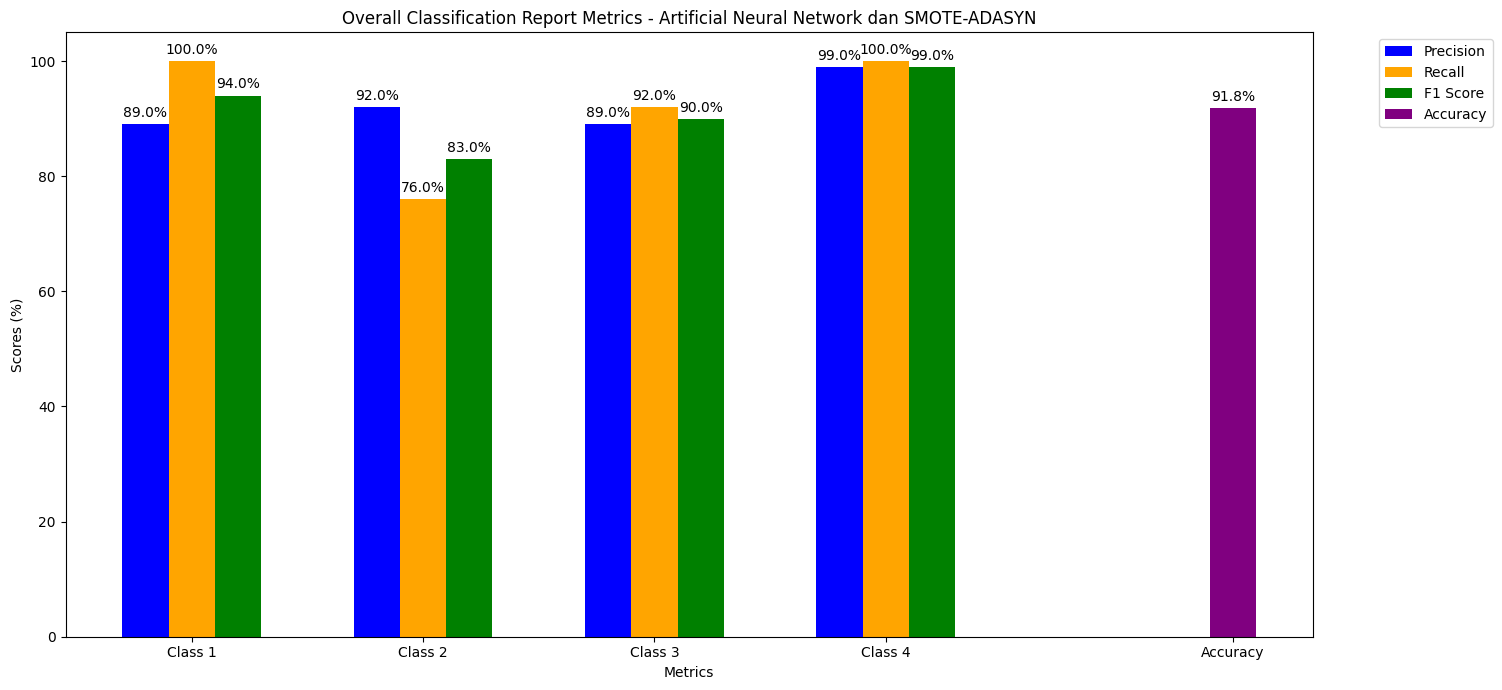

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari output yang diberikan pengguna
precision = [89.0, 92.0, 89.0, 99.0]
recall = [100.0, 76.0, 92.0, 100.0]
f1_score = [94.0, 83.0, 90.0, 99.0]
accuracy = 91.85

labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
x = np.arange(len(labels))  # lokasi label
width = 0.2  # lebar bar

fig, ax = plt.subplots(figsize=(15, 7))

rects1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
rects2 = ax.bar(x, recall, width, label='Recall', color='orange')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='green')
rects4 = ax.bar(len(labels) + 0.5, accuracy, width, label='Accuracy', color='purple')

# Menambahkan teks untuk label, judul, dan custom tick label x-axis
ax.set_ylabel('Scores (%)')
ax.set_xlabel('Metrics')
ax.set_title('Overall Classification Report Metrics - Artificial Neural Network dan SMOTE-ADASYN')
ax.set_xticks(list(x) + [len(labels) + 0.5])
ax.set_xticklabels(labels + ['Accuracy'])
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Menambahkan anotasi
def autolabel(rects, ax):
    """Menambahkan label teks di atas setiap bar di *rects*, menampilkan tingginya."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset vertikal 3 poin
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax)
autolabel(rects4, ax)

fig.tight_layout()

# Menampilkan plot
plt.show()
